In [1]:
# ipython settings
%load_ext autoreload
%autoreload 2
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error # we are going to assess the quality of the model based on the generalization MSE
from sklearn.metrics import accuracy_score
from sympy import init_printing # We use sympy to display mathematical expresssions 
import numpy as np # we use numpy to deal with arrays
import lime 
import lime.lime_tabular
init_printing()

In [49]:
def f(X):
    X = np.array(X)
    Y = np.zeros((X.shape[0], 2))
    radius = 0.75
    margin = 0.1
        
    Y[X[:, 0]**2 + X[:, 1]**2 <= radius - margin, 0] = 1.
    Y[X[:, 0]**2 + X[:, 1]**2 <= radius - margin, 1] = 0.
    
    Y[(radius - margin < X[:, 0]**2 + X[:, 1]**2) *\
          (X[:, 0]**2 + X[:, 1]**2 <= radius), 0] = .75
    Y[(radius - margin < X[:, 0]**2 + X[:, 1]**2) *\
          (X[:, 0]**2 + X[:, 1]**2 <= radius), 1] = .25
    

    Y[(radius < X[:, 0]**2 + X[:, 1]**2) *\
          (X[:, 0]**2 + X[:, 1]**2 <= radius + margin), 0] = .25
    Y[(radius < X[:, 0]**2 + X[:, 1]**2) *\
          (X[:, 0]**2 + X[:, 1]**2 <= radius + margin), 1] = .75
    
    Y[X[:, 0]**2 + X[:, 1]**2 > (radius + margin), 0] = 0.
    Y[X[:, 0]**2 + X[:, 1]**2 > (radius + margin), 1] = 1.
    
    return Y

dim_X = 2

In [50]:
n_pts = 100
X = np.random.uniform(-1, 1, (n_pts, dim_X))

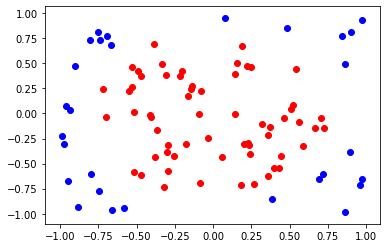

In [58]:
import matplotlib.pyplot as plt
y = f(X)
plt.Circle((0, 0), 0.75, color='g', fill=False)
plt.scatter(X[:, 0][y[:, 0] > 0.75], X[:, 1][y[:, 0] > 0.75], c='r')
plt.scatter(X[:, 0][y[:, 1] > 0.75], X[:, 1][y[:, 1] > 0.75], c='b')
plt.show()

In [59]:
n_test = 20
X_test = np.random.uniform(-1, 1, (n_test, dim_X))

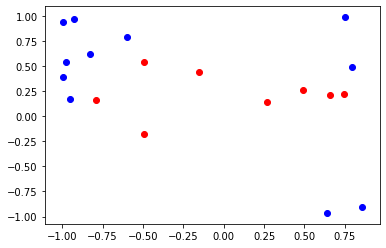

In [60]:
import matplotlib.pyplot as plt
y_ = f(X_test)
plt.Circle((0, 0), 0.75, color='g', fill=False)
plt.scatter(X_test[:, 0][y_[:, 0] > 0.75], X_test[:, 1][y_[:, 0] > 0.75], c='r')
plt.scatter(X_test[:, 0][y_[:, 1] > 0.75], X_test[:, 1][y_[:, 1] > 0.75], c='b')
plt.show()

In [61]:
def order_weights(exp_list):
    ordered_weights = [0 for _ in range(dim_X)]
    for tup in exp_list:
        feature_id = int(tup[0].split('x_')[1][0])
        ordered_weights[feature_id-1] = tup[1]    
    return ordered_weights   

In [62]:
lime_weight_list = []
explainer = lime.lime_tabular.LimeTabularExplainer(X, 
                                                   feature_names=["x_"+str(k) for k in range(1,dim_X+1)], 
                                                   class_names=['f'], 
                                                   verbose=True,
                                                   mode='classification')

for i in range(n_test):
    exp = explainer.explain_instance(X_test[i], f, num_features=dim_X)
    lime_weight_list.append(order_weights(exp.as_list()))  
                            
print(lime_weight_list) 

Intercept 0.4480436492176862
Prediction_local [-0.03804627]
Right: 0.0
Intercept 0.3273243888280303
Prediction_local [0.3331639]
Right: 0.0
Intercept 0.17803539208450603
Prediction_local [0.78901496]
Right: 1.0
Intercept 0.17279277953599376
Prediction_local [0.76639239]
Right: 1.0
Intercept 0.18799135128761005
Prediction_local [0.77093387]
Right: 1.0
Intercept 0.33054673923333006
Prediction_local [0.32808405]
Right: 1.0
Intercept 0.22032575429454454
Prediction_local [0.65433939]
Right: 1.0
Intercept 0.17573455104795765
Prediction_local [0.78504425]
Right: 1.0
Intercept 0.35486310296124673
Prediction_local [0.24830072]
Right: 0.0
Intercept 0.1708786122528961
Prediction_local [0.77029991]
Right: 1.0
Intercept 0.35728547145819134
Prediction_local [0.25646784]
Right: 0.0
Intercept 0.3620569878894218
Prediction_local [0.26170664]
Right: 0.0
Intercept 0.3280208318537074
Prediction_local [0.35114222]
Right: 1.0
Intercept 0.47493003963163916
Prediction_local [-0.11442621]
Right: 0.0
Intercept 

In [ ]:
from symbolic_pursuit.classification import SymbolicClassifier  # our symbolic model class

symbolic_model = SymbolicClassifier(maxiter=10,
                                    nclasses=2,
                                    eps=1.0e-4)
symbolic_model.fit(f, X[:25])

Model created with the following hyperparameters :
 loss_tol=0.001 
 ratio_tol=0.9 
 maxiter=10 
 eps=0.0001 
 random_seed=42
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Now working on term number  1 .
Now working on hyperparameter tree number  1 .
Optimization terminated successfully.
         Current function value: 0.311916
         Iterations: 5
         Function evaluations: 243
         Gradient evaluations: 27
Now working on hyperparameter tree number  2 .
         Current function value: 0.311922
         Iterations: 10
         Function evaluations: 286
         Gradient evaluations: 26
Now working on hyperparameter tree number  3 .
         Current function value: 0.311923
         Iterations: 10
         Function evaluations: 360
         Gradient evaluations: 30
The tree number  1  was selected as the best.
Backfitting complete.
The current model has the following expression:  -0.0154259234097494*[ReLU(P1)]**0.1394997